In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

In [2]:
df = pd.read_csv('../../data/cleaned_cdc_2020.csv')
df_ovr = df[df['StratificationID1'] == 'OVERALL']

In [3]:
df_ovr.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
24,2016,NM,New Mexico,28.3,5531.0,"(34.520880952, -106.240580985)",Q036,OVR,OVERALL
38,2016,NH,New Hampshire,26.6,5888.0,"(43.655950113, -71.50036092)",Q036,OVR,OVERALL
54,2016,AZ,Arizona,23.1,10921.0,"(34.86597028, -111.763811277)",Q047,OVR,OVERALL
86,2016,MT,Montana,25.5,5483.0,"(47.066528972, -109.424420645)",Q036,OVR,OVERALL
112,2017,IA,Iowa,25.0,7145.0,"(42.469400913, -93.816490556)",Q047,OVR,OVERALL


In [4]:
df_dum = pd.get_dummies(df_ovr, columns = ['QuestionID'])

In [5]:
df_dum.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,StratificationCategoryId1,StratificationID1,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
24,2016,NM,New Mexico,28.3,5531.0,"(34.520880952, -106.240580985)",OVR,OVERALL,0,0,1,0,0,0,0,0,0
38,2016,NH,New Hampshire,26.6,5888.0,"(43.655950113, -71.50036092)",OVR,OVERALL,0,0,1,0,0,0,0,0,0
54,2016,AZ,Arizona,23.1,10921.0,"(34.86597028, -111.763811277)",OVR,OVERALL,0,0,0,0,0,0,0,0,1
86,2016,MT,Montana,25.5,5483.0,"(47.066528972, -109.424420645)",OVR,OVERALL,0,0,1,0,0,0,0,0,0
112,2017,IA,Iowa,25.0,7145.0,"(42.469400913, -93.816490556)",OVR,OVERALL,0,0,0,0,0,0,0,0,1


In [6]:
dummy_cols = [col for col in df_dum.columns if col.startswith('QuestionID')]

In [7]:
df_dum[dummy_cols].multiply(df_dum['Data_Value'], axis="index")

,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
24,0.0,0.0,28.3,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.1
86,0.0,0.0,25.5,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
76714,41.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76726,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76821,43.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76822,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_dum.loc[:,dummy_cols] = df_dum.loc[:,dummy_cols].multiply(df_dum.loc[:, 'Data_Value'], axis="index")

In [9]:
df_dum

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,StratificationCategoryId1,StratificationID1,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
24,2016,NM,New Mexico,28.3,5531.0,"(34.520880952, -106.240580985)",OVR,OVERALL,0.0,0.0,28.3,0.0,0.0,0.0,0.0,0.0,0.0
38,2016,NH,New Hampshire,26.6,5888.0,"(43.655950113, -71.50036092)",OVR,OVERALL,0.0,0.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0
54,2016,AZ,Arizona,23.1,10921.0,"(34.86597028, -111.763811277)",OVR,OVERALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.1
86,2016,MT,Montana,25.5,5483.0,"(47.066528972, -109.424420645)",OVR,OVERALL,0.0,0.0,25.5,0.0,0.0,0.0,0.0,0.0,0.0
112,2017,IA,Iowa,25.0,7145.0,"(42.469400913, -93.816490556)",OVR,OVERALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76714,2019,KS,Kansas,41.4,10120.0,"(38.34774030000045, -98.20078122699965)",OVR,OVERALL,41.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76726,2019,TN,Tennessee,43.0,5313.0,"(35.68094058000048, -85.77449091399967)",OVR,OVERALL,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76821,2019,NV,Nevada,43.4,2577.0,"(39.493240390000494, -117.07184056399967)",OVR,OVERALL,43.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76822,2019,AK,Alaska,42.8,2640.0,"(64.84507995700051, -147.72205903599973)",OVR,OVERALL,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = df_dum[['YearStart', 'LocationAbbr', 'StratificationID1'] + dummy_cols]

In [11]:
df.head()

,YearStart,LocationAbbr,StratificationID1,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
24,2016,NM,OVERALL,0.0,0.0,28.3,0.0,0.0,0.0,0.0,0.0,0.0
38,2016,NH,OVERALL,0.0,0.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0
54,2016,AZ,OVERALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.1
86,2016,MT,OVERALL,0.0,0.0,25.5,0.0,0.0,0.0,0.0,0.0,0.0
112,2017,IA,OVERALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0


In [12]:
df.replace(0.0, np.nan, inplace = True)

C:\Users\rmped\AppData\Local\Temp\ipykernel_16460\3226985326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(0.0, np.nan, inplace = True)


In [13]:
df.head()

,YearStart,LocationAbbr,StratificationID1,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
24,2016,NM,OVERALL,NaN,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN
38,2016,NH,OVERALL,NaN,NaN,26.6,NaN,NaN,NaN,NaN,NaN,NaN
54,2016,AZ,OVERALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1
86,2016,MT,OVERALL,NaN,NaN,25.5,NaN,NaN,NaN,NaN,NaN,NaN
112,2017,IA,OVERALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0


In [14]:
df['concat_id'] = df['YearStart'].astype(str).str.cat(df['LocationAbbr'], sep = '_')

C:\Users\rmped\AppData\Local\Temp\ipykernel_16460\1096814807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concat_id'] = df['YearStart'].astype(str).str.cat(df['LocationAbbr'], sep = '_')


In [15]:
df.head()

,YearStart,LocationAbbr,StratificationID1,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047,concat_id
24,2016,NM,OVERALL,NaN,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,2016_NM
38,2016,NH,OVERALL,NaN,NaN,26.6,NaN,NaN,NaN,NaN,NaN,NaN,2016_NH
54,2016,AZ,OVERALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1,2016_AZ
86,2016,MT,OVERALL,NaN,NaN,25.5,NaN,NaN,NaN,NaN,NaN,NaN,2016_MT
112,2017,IA,OVERALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2017_IA


In [16]:
df.drop(columns = ['YearStart', 'LocationAbbr', 'StratificationID1'], inplace = True)
df.head()

C:\Users\rmped\AppData\Local\Temp\ipykernel_16460\1580892293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['YearStart', 'LocationAbbr', 'StratificationID1'], inplace = True)


,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047,concat_id
24,NaN,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,2016_NM
38,NaN,NaN,26.6,NaN,NaN,NaN,NaN,NaN,NaN,2016_NH
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.1,2016_AZ
86,NaN,NaN,25.5,NaN,NaN,NaN,NaN,NaN,NaN,2016_MT
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2017_IA


In [17]:
df_qids = df.groupby('concat_id', as_index=False).first()

In [18]:
df_qids.head()

,concat_id,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
0,2011_AK,NaN,NaN,27.4,38.9,57.9,25.0,37.7,33.8,22.0
1,2011_AL,NaN,NaN,32.0,34.7,42.4,15.0,23.9,24.7,32.6
2,2011_AR,NaN,NaN,30.9,33.9,45.7,16.7,27.8,24.7,30.9
3,2011_AZ,NaN,NaN,25.1,37.8,52.8,24.2,33.1,32.5,24.1
4,2011_CA,NaN,NaN,23.8,36.4,58.2,23.7,36.1,32.1,19.1


In [19]:
df_qids.isnull().sum()

concat_id            0
QuestionID_Q018    408
QuestionID_Q019    408
QuestionID_Q036      0
QuestionID_Q037      0
QuestionID_Q043    255
QuestionID_Q044    255
QuestionID_Q045    255
QuestionID_Q046    255
QuestionID_Q047      0
dtype: int64

In [20]:
df_qids.shape

(509, 10)

In [21]:
df_qids.describe()

,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
count,101.000000,101.000000,509.000000,509.000000,254.000000,254.000000,254.000000,254.000000,509.000000
mean,38.177228,19.026733,29.842829,35.246169,51.156693,20.738583,31.883071,30.700000,24.659136
std,4.490320,2.794634,3.957114,1.397372,5.183183,3.204642,4.311258,3.907528,4.258237
min,29.700000,12.400000,20.200000,29.100000,36.300000,12.200000,20.600000,18.600000,15.700000
25%,35.200000,17.000000,26.900000,34.500000,47.800000,18.800000,28.825000,28.425000,21.500000
50%,37.400000,19.000000,29.800000,35.300000,50.900000,21.100000,31.400000,30.400000,24.500000
75%,41.300000,21.300000,32.400000,36.200000,54.975000,23.000000,34.800000,32.875000,27.200000
max,48.400000,25.600000,40.800000,39.100000,64.100000,28.500000,45.800000,40.600000,38.100000


In [22]:
for i in df_qids.drop(columns = ['concat_id']).columns:
    df_qids[i].fillna(df_qids[i].mean(), inplace = True)
df_qids.head()

,concat_id,QuestionID_Q018,QuestionID_Q019,QuestionID_Q036,QuestionID_Q037,QuestionID_Q043,QuestionID_Q044,QuestionID_Q045,QuestionID_Q046,QuestionID_Q047
0,2011_AK,38.177228,19.026733,27.4,38.9,57.9,25.0,37.7,33.8,22.0
1,2011_AL,38.177228,19.026733,32.0,34.7,42.4,15.0,23.9,24.7,32.6
2,2011_AR,38.177228,19.026733,30.9,33.9,45.7,16.7,27.8,24.7,30.9
3,2011_AZ,38.177228,19.026733,25.1,37.8,52.8,24.2,33.1,32.5,24.1
4,2011_CA,38.177228,19.026733,23.8,36.4,58.2,23.7,36.1,32.1,19.1


In [23]:
# Pipelines from survey code
def model(model):
    models = model
    models.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {models.score(X_train, y_train)}')
    print(f'Testing r2 score: {models.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, models.predict(X_test))}')
    return print('='*40)

In [24]:

X = df_qids.drop(columns = ['concat_id', 'QuestionID_Q036'])
y = df_qids['QuestionID_Q036']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.5358376733414119
Testing r2 score: 0.517978776228532
Testing MSE: 7.639744253787531
KNeighborsRegressor()
Training r2 score: 0.7053534423428253
Testing r2 score: 0.5894125332187394
Testing MSE: 6.507562500000001
DecisionTreeRegressor()
Training r2 score: 0.9948234529931087
Testing r2 score: 0.17327280365448594
Testing MSE: 13.103125
BaggingRegressor()
Training r2 score: 0.9186926413798978
Testing r2 score: 0.5212836187087384
Testing MSE: 7.58736450347222
RandomForestRegressor()
Training r2 score: 0.9363139686400335
Testing r2 score: 0.566643953789703
Testing MSE: 6.868430684390064
AdaBoostRegressor()
Training r2 score: 0.6379781639943486
Testing r2 score: 0.50028943975505
Testing MSE: 7.920109515755063


In [25]:
knn = KNeighborsRegressor(n_neighbors = 8, metric = 'manhattan')
knn.fit(X_train, y_train)
print(f'Training r2 score: {knn.score(X_train, y_train)}')
print(f'Testing r2 score: {knn.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, knn.predict(X_test))}')
print(f'Beseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.6696102523782793
Testing r2 score: 0.5920992764573547
Testing MSE: 6.464979248046875
Beseline MSE: 15.855972805982972


In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Training r2 score: {lr.score(X_train, y_train)}')
print(f'Testing r2 score: {lr.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, lr.predict(X_test))}')
print(f'Beseline MSE: {metrics.mean_squared_error(y_test, pd.Series(y.mean(), index=range(len(y_test))))}')

Training r2 score: 0.5358376733414119
Testing r2 score: 0.517978776228532
Testing MSE: 7.639744253787531
Beseline MSE: 15.855972805982972


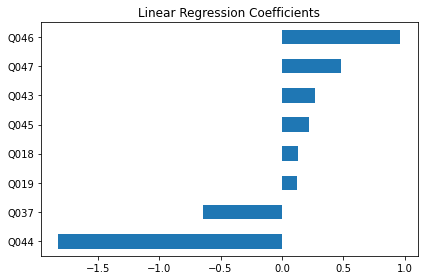

In [27]:
linear_regression_coefs = pd.Series(lr.coef_, index = ['Q018', 'Q019', 'Q037', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047']).sort_values()
linear_regression_coefs.plot.barh()
plt.title('Linear Regression Coefficients')
plt.tight_layout()
plt.savefig('../../images/lr_survey_coefs.png');
